<a href="https://colab.research.google.com/github/garciamariane/CPE009B_CPE21S1/blob/main/Garcia_HOA8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2025-2026
<u>**ACTIVITY NO.** | **Hands-on Activity 8.1 ORB Feature Detection and Feature Matching**
**Name** | Garcia, Mariane
**Section** | CPE31S5
**Date Performed**: | 100925
**Date Submitted**: | 100925
**Instructor**: |Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform feature detection and feature matching using Oriented FAST and Rotated BRIEF (ORB) algorithm with OpenCV.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Demonstrate the use of oriented FAST and rotated BRIEF algorithm implemented through the use of OpenCV, debugging and modification.
* Evaluate feature detection using Oriented FAST and rotated BRIEF algorithm on images to detect important features.

## 3. Procedures and Outputs

**BEFORE YOU PROCEED WITH THIS SECTION: PLEASE MAKE SURE YOU HAVE READ THE CONTENTS OF THE MODULE REGARDING BRIEF AND FAST**

The team that created ORB (Ethan Rublee, Vincent Rabaud, Kurt Konolige, and Gary R. Bradski) chose to build it on FAST and BRIEF because these two algorithms are fast and efficient.

In their paper, the authors of ORB set out to achieve the following:

* Add a fast and accurate way to determine the orientation of FAST keypoints.
* Find a way to efficiently compute BRIEF features that are also rotation-invariant.
Analyze the variance and correlation of oriented BRIEF features.
* Develop a learning method to decorrelate BRIEF features under rotational invariance, which would improve performance in nearest-neighbor applications.
* In other words, the ORB team wanted to make feature detection and matching faster and more accurate, especially in situations where the training image and query image have different rotations.

The main points of the text are clear, even if you don't understand all of the technical jargon. ORB is a fast and efficient algorithm for feature detection and matching, and it is especially good at matching features that have different rotations.

I bet you are eager to start coding with ORB, so let's move on to some code examples.

Parts of this activity contribute towards the attainment of `ILO1: Demonstrate the use of oriented FAST and rotated BRIEF algorithm implemented through the use of OpenCV, debugging and modification.`

In [13]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image1 = cv2.imread('/content/drive/MyDrive/BIG DATA ENGINEERING/PS4.JPG', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/drive/MyDrive/BIG DATA ENGINEERING/PS4_IMG2.JPG', cv2.IMREAD_GRAYSCALE)

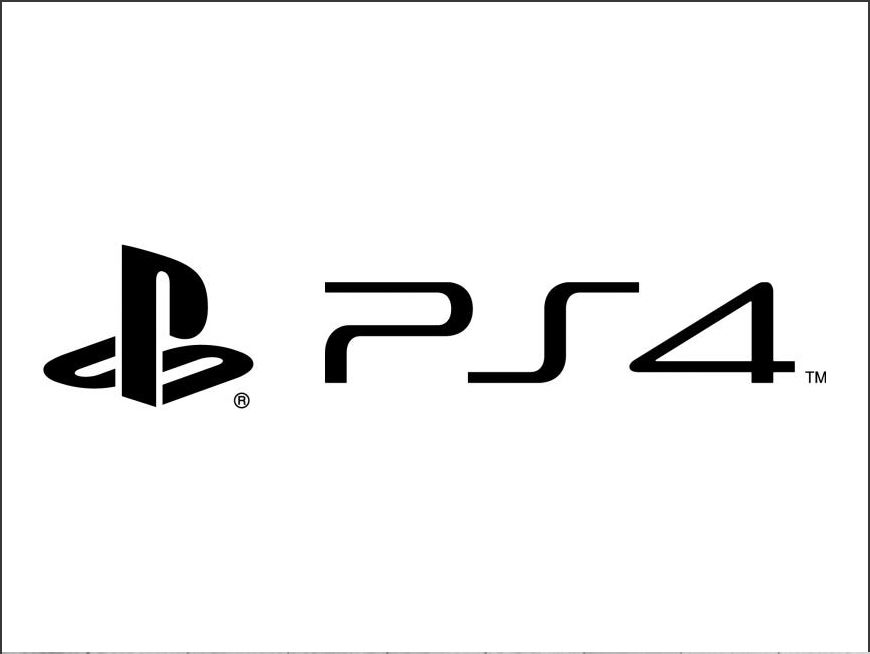

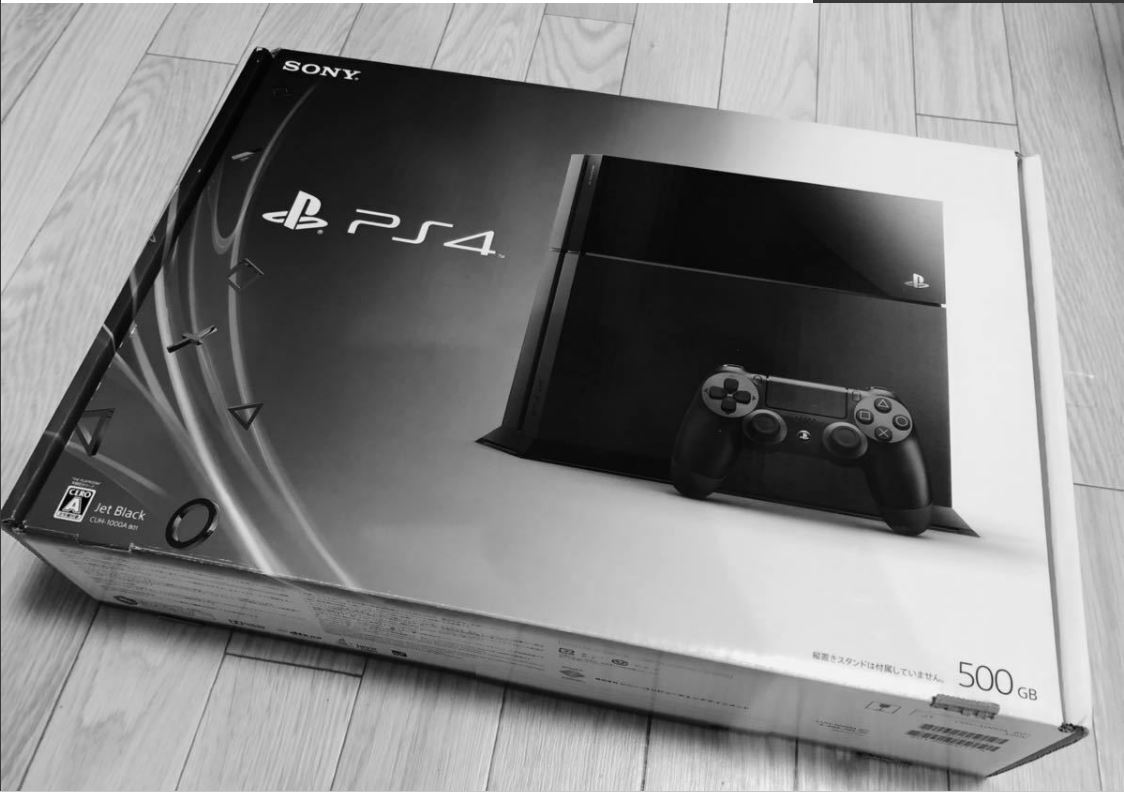

In [14]:
# Preview the 2 images
cv2_imshow(image1)
cv2_imshow(image2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

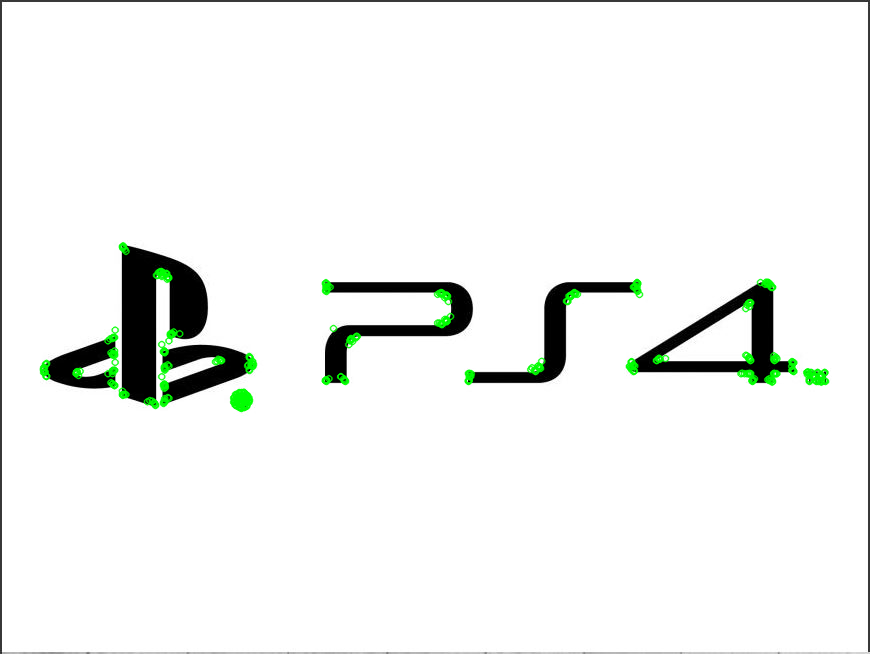

In [21]:

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(image1,None) # Reference image
kp2, des2 = orb.detectAndCompute(image2,None)

cv2_imshow(img_kp1)


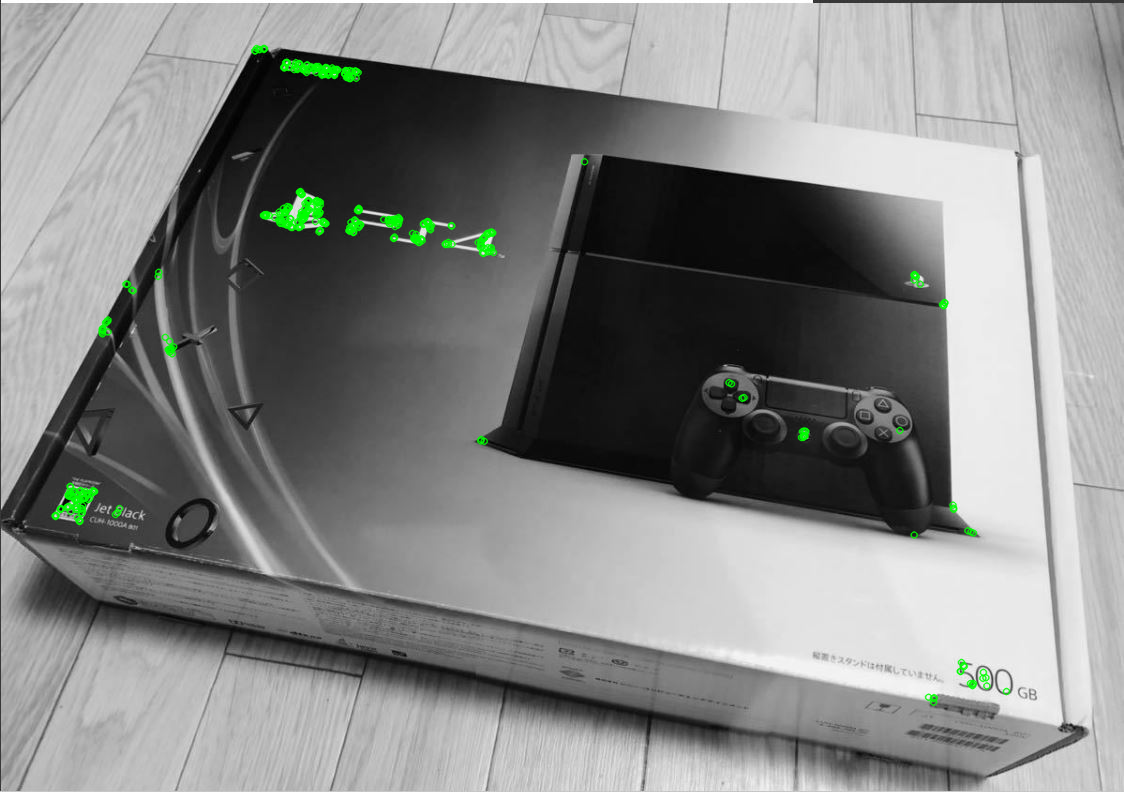

In [22]:
cv2_imshow(img_kp2)

**Analysis: Explain the purpose of detector and descriptor and why they're used
here.**

**: The detector finds where interesting points are,
and the descriptor explains what each point looks like
together they enable comparing and matching images**

In [24]:
"""
The BFMatcher is a simple but effective algorithm for feature matching.
It works by comparing each feature in one image to every feature in the other
image and returning the pair of features with the smallest distance.
"""

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

"""
The match() method takes two arguments:
  - the descriptors of the features in the first image
  - the descriptors of the features in the second image.

It returns a list of matches, where each match is a pair of feature indices,
one from each image.
"""

matches = bf.match(des1,des2)


In [25]:

"""
Next, we sort the matches in order of their distance.
This ensures that the best matches are returned first.
"""
sorted_matches = sorted(matches, key = lambda x:x.distance)

"""
Then, we draw the top 40 matches between the two images.
The drawMatches() method takes two arguments: the two images, and a list of matches.
It draws lines between the corresponding keypoints in the two images.
"""

image3 = cv2.drawMatches(image1,kp1,image2,kp2, sorted_matches[:40],image2,flags=2)

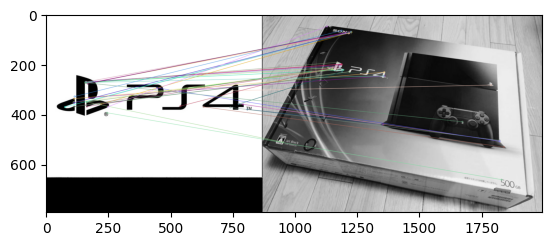

(<matplotlib.image.AxesImage at 0x7edc25aea330>, None)

In [26]:
from matplotlib import pyplot as plt

plt.imshow(image3),plt.show()

**Question**
- Provide an analysis on the way the ORB algorithm works here, are the results correct? What can/should be improved?

In order to match features between images, the ORB method finds keypoints and calculates binary descriptors. Although incorrect matches may occur, the results are usually accurate. Increasing features, employing RANSAC to filter outliers, and utilizing KNN with Lowe's ratio test can all increase accuracy.

## 4. Supplementary Activity

**ILO2: Evaluate feature detection using Oriented FAST and rotated BRIEF algorithm on images to detect important features.**

Perform the following tasks:
1. Find 2 images of brand logos on the internet.
2. Find 5 product images containing one logo each.
3. Test the ORB algorithm to detect and match the features on the images. Document the testing.
4. Evaluate the algorithm's performance, was it able to detect the important features? Was it also reliable in not finding the logos that are not on the provided images?
5. Provide an analysis: Why did it work, or otherwise? What would you change to improve the results if you could?

In [30]:
sb1 = cv2.imread('/content/drive/MyDrive/BIG DATA ENGINEERING/SB1.jpg',cv2.IMREAD_GRAYSCALE)
sb2 = cv2.imread('/content/drive/MyDrive/BIG DATA ENGINEERING/SB2.png',cv2.IMREAD_GRAYSCALE)

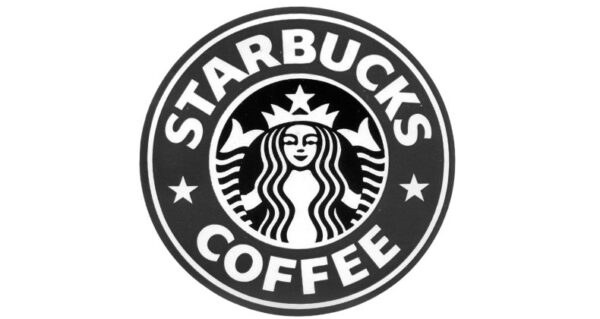

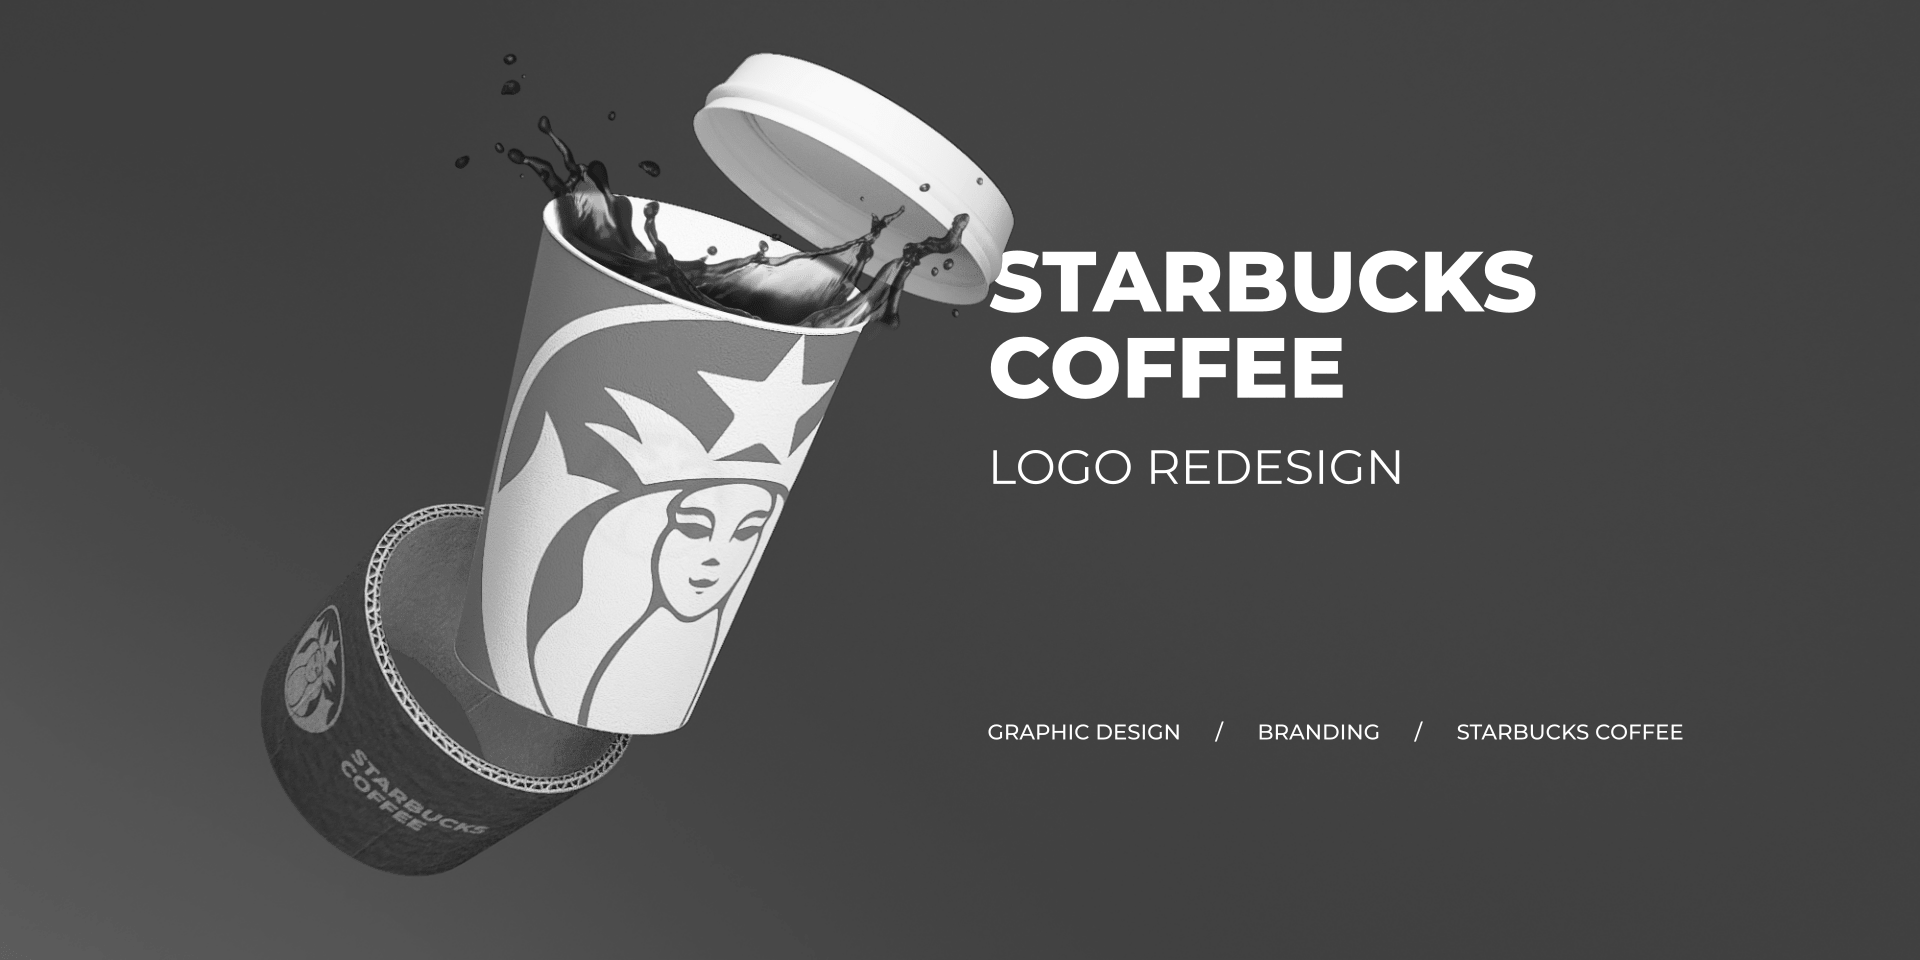

In [31]:
# Preview the 2 images
cv2_imshow(sb1)
cv2_imshow(sb2)

In [32]:
product_paths = [
    '/content/drive/MyDrive/BIG DATA ENGINEERING/P1.png',
    '/content/drive/MyDrive/BIG DATA ENGINEERING/P2.jfif',
    '/content/drive/MyDrive/BIG DATA ENGINEERING/P3.webp',
    '/content/drive/MyDrive/BIG DATA ENGINEERING/PS4.JPG',
    '/content/drive/MyDrive/BIG DATA ENGINEERING/P5.webp'
]

In [34]:
orb = cv2.ORB_create(nfeatures=1500)

kp1, des1 = orb.detectAndCompute(sb1, None)
kp2, des2 = orb.detectAndCompute(sb2, None)


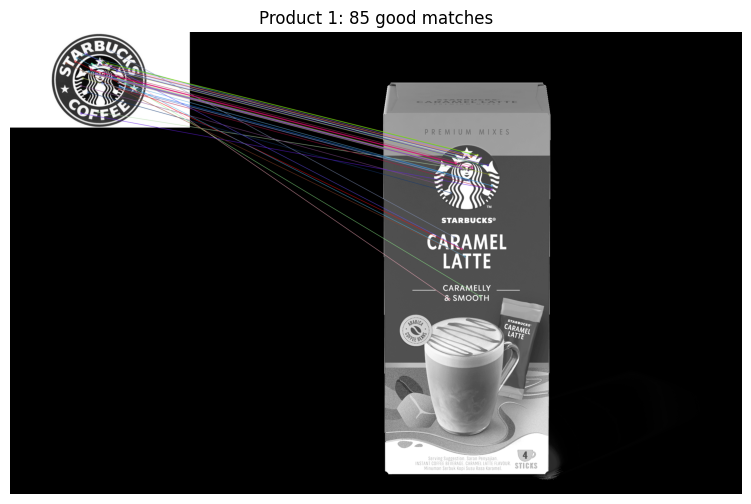

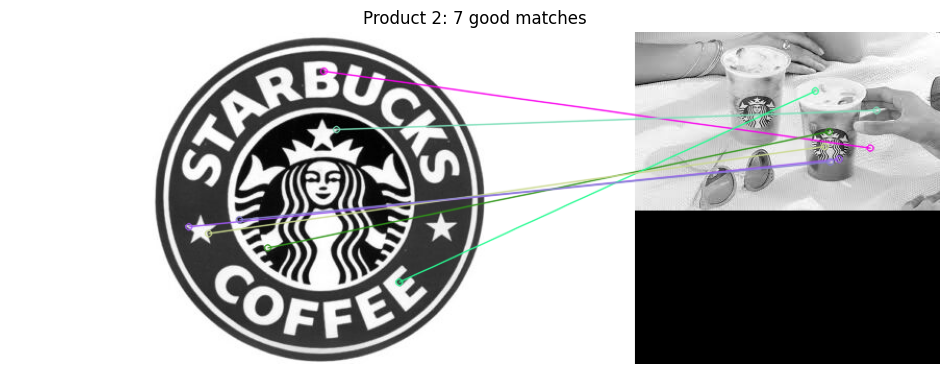

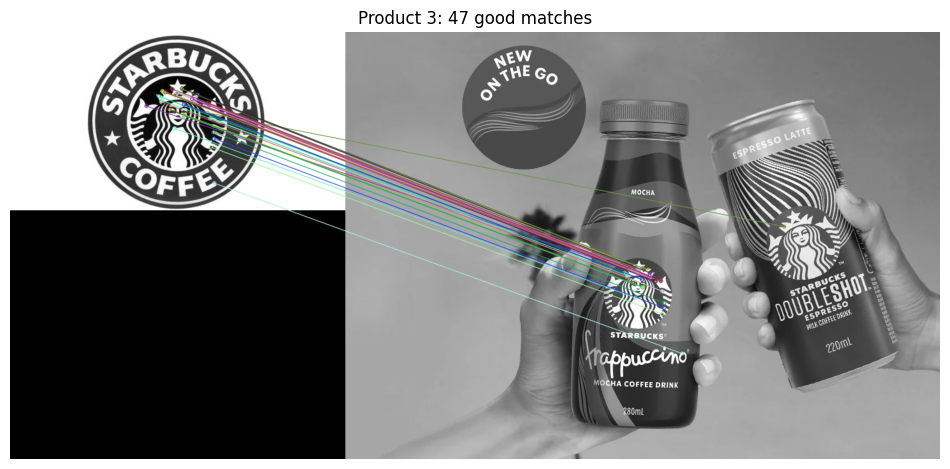

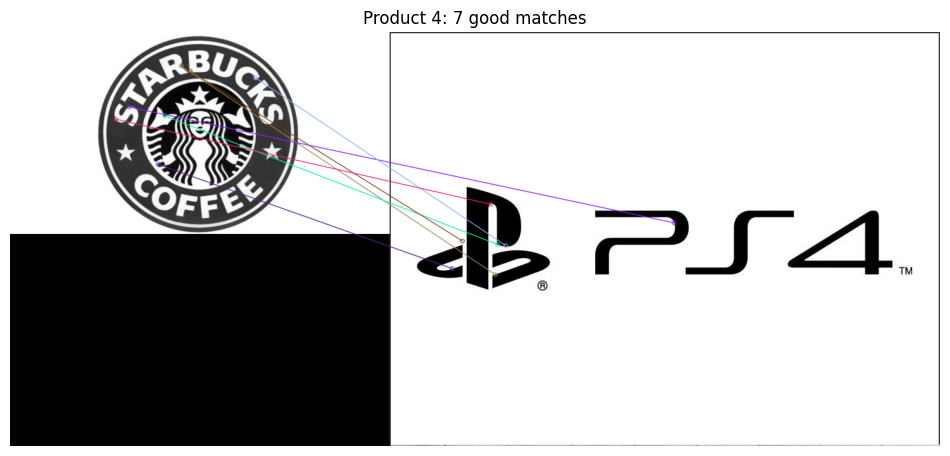

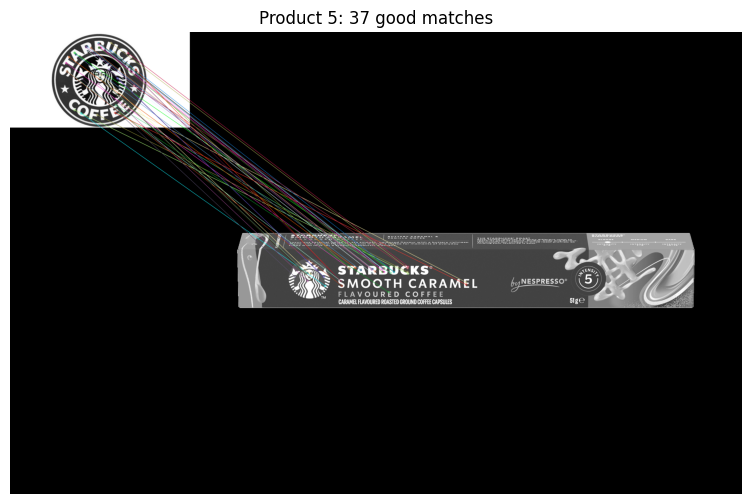

In [35]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

for i, path in enumerate(product_paths, 1):
    product = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    kp_p, des_p = orb.detectAndCompute(product, None)

    matches = bf.knnMatch(des1, des_p, k=2)


    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)

    matched_img = cv2.drawMatches(sb1, kp1, product, kp_p, good[:40], None, flags=2)

    plt.figure(figsize=(12,6))
    plt.title(f'Product {i}: {len(good)} good matches')
    plt.imshow(matched_img)
    plt.axis('off')
    plt.show()


Evaluation: The ORB algorithm did an effective task of identifying the key elements of the Starbucks logo in the majority of the product photos. When the image was clear, sharp, and the brand wasn't obscured or too small, it could detect it easily. In other photographs where the logo was fuzzy, angled too much, or had reflections, it didn’t match as well. Additionally, it demonstrated the ability to distinguish between images that match and those that don't, as evidenced by its ability to not recognize the logo in photographs that didn't have it.

Analysis: It was successful because ORB searches for forms and patterns that remain constant even when the image's size or angle varies slightly. Because it was unable to identify enough strong features to match, it performed poorly in pictures that were dark or indistinct. I would try utilizing additional keypoints, applying a technique like RANSAC to eliminate bad matches, or testing alternative algorithms like SIFT that are better able to handle blur and illumination variations.

## 5. Summary, Conclusions and Lessons Learned

With everything considered, the ORB algorithm successfully identified the Starbucks logo in the majority of the product photos, particularly when it was visible and unobstructed. It demonstrated that feature detection is an effective method for recognizing items by their shapes and patterns. Nevertheless, it has trouble identifying details in low-quality or hazy photos. This demonstrates that although ORB is quick and dependable for simple logo detection, under challenging circumstances, its accuracy may decline. The results may be even more accurate and consistent with a few tweaks, such as eliminating erroneous matches or utilizing more sophisticated algorithms.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*